In [1]:
import pandas as pd
import numpy as np
import datetime as datetime

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pwd

/home/shmiggit/code/AmaurySalles/projectwind/notebooks


In [7]:
data = pd.read_csv('../raw_data/raw_data.csv', index_col=0, parse_dates=True, dayfirst=True)

In [8]:
data.head()

,Misalignment 1,Power 1,Nacelle Orientation 1,Wind Speed 1,Blade Pitch 1,Misalignment 2,Power 2,Nacelle Orientation 2,Wind Speed 2,Blade Pitch 2,...,Misalignment 24,Power 24,Nacelle Orientation 24,Wind Speed 24,Blade Pitch 24,Misalignment 25,Power 25,Nacelle Orientation 25,Wind Speed 25,Blade Pitch 25
Datetime,,,,,,,,,,,,,,,,,,,,,
2019-01-05 00:00:00,352.6418,1748.94,139.5922,10.1212,-0.6609,357.1708,1841.91,339.8458,10.3253,-0.8578,...,354.6694,1291.06,63.0,8.8373,-0.9087,359.0061,1360.88,85.0,8.7587,-0.7877
2019-01-05 00:10:00,1.5354,1712.80,134.0000,9.3673,-0.3824,359.6353,1960.11,339.0000,10.3788,-0.8060,...,358.0417,1317.95,63.0,8.6073,-0.7432,1.8556,1588.45,85.0,9.0568,-0.5709
2019-01-05 00:20:00,0.2834,2064.15,134.0000,10.3667,1.0528,1.7305,1921.56,339.0000,10.1628,-0.7832,...,357.7514,1134.93,63.0,8.2067,-0.7510,359.2915,1822.61,85.0,9.8567,-0.4996
2019-01-05 00:30:00,357.3376,2061.11,134.0000,11.2020,3.0485,358.7202,2080.04,339.0000,10.8123,0.7287,...,356.6621,1178.57,63.0,8.4860,-0.8185,358.6694,1826.85,85.0,9.8418,-0.4788
2019-01-05 00:40:00,357.9806,2081.33,134.0000,11.1048,3.1102,358.0829,2088.48,339.0000,10.8333,0.4868,...,356.3252,1147.18,63.0,8.5223,-0.8777,359.0999,1461.52,85.0,9.0207,-0.8073


# Value Cleaning

## Repeating Sensor Values

# Index Cleaning

In [9]:
data.sort_index(inplace=True)

In [10]:
start_date = data.index.min()
end_date = data.index.max()
freq = '10T'
start_date, end_date

(Timestamp('2019-01-05 00:00:00'), Timestamp('2021-12-09 23:50:00'))

In [11]:
ref_date_range = pd.date_range(start_date, end_date, freq=freq)
ref_df = pd.DataFrame(index=ref_date_range)
print(f"ref_index length: {'{:,}'.format(len(ref_date_range))} \n",
      f"data.index length: {'{:,}'.format(len(data.index))} \n", 
      f"missing values: {'{:,}'.format(len(ref_date_range)-len(data.index))}")

ref_index length: 154,080 
 data.index length: 123,037 
 missing values: 31,043


In [12]:
index_na = (len(ref_date_range)-len(data.index))/len(ref_date_range)
index_na

0.2014732606438214

In [13]:
clean_data = data.reindex(ref_df.index)

In [14]:
clean_data[clean_data.index.duplicated(keep=False)==True].index

DatetimeIndex([], dtype='datetime64[ns]', freq='10T')

In [15]:
# Number na / month
na = clean_data.isna()

In [16]:
na.resample('M').sum().mean(axis=1)/ 4320 *100

2019-01-31    65.760556
2019-02-28    68.890926
2019-03-31    78.405370
2019-04-30    74.793519
2019-05-31    17.363333
2019-06-30    18.352778
2019-07-31    43.661667
2019-08-31    23.712037
2019-09-30    15.157963
2019-10-31    27.435556
2019-11-30    14.923148
2019-12-31    18.522407
2020-01-31     3.877593
2020-02-29     6.620741
2020-03-31     1.139074
2020-04-30     2.082222
2020-05-31     3.788148
2020-06-30     1.552222
2020-07-31     2.939444
2020-08-31     4.840000
2020-09-30     3.835000
2020-10-31     5.556852
2020-11-30     3.010926
2020-12-31     1.871667
2021-01-31    11.735741
2021-02-28    13.218889
2021-03-31    11.613519
2021-04-30    14.126667
2021-05-31    11.562778
2021-06-30    11.949630
2021-07-31    13.354630
2021-08-31    11.940185
2021-09-30    11.573704
2021-10-31    73.960000
2021-11-30    70.354259
2021-12-31     1.200370
Freq: M, dtype: float64

In [26]:
# Clean data slice
clean_data = clean_data.loc['2019-05-05':'2021-09-30']

# Analysis

In [49]:
scaled_samples = []

In [62]:
scaled_samples.append(data_cat.head(10))

In [67]:
scaled_samples

[                     Wind Speed 1  Wind Speed 2  Wind Speed 3  Wind Speed 4  \
 2019-05-05 00:00:00        9.0322        9.5330        9.4732        9.8563   
 2019-05-05 00:10:00        9.5503        9.3778        9.8493        9.8632   
 2019-05-05 00:20:00        9.9860        9.0173       10.5930        9.4083   
 2019-05-05 00:30:00        9.3938        9.4890        9.9165        8.6255   
 2019-05-05 00:40:00        9.5585        9.6638       10.4895        8.3145   
 2019-05-05 00:50:00        9.8952        9.3645       10.7160        7.7298   
 2019-05-05 01:00:00        9.7757        8.9505       10.2272        8.1765   
 2019-05-05 01:10:00        8.9415        9.2913        9.7828        8.4737   
 2019-05-05 01:20:00        8.4372        8.9782        9.0858        8.4420   
 2019-05-05 01:30:00        8.5772        9.0372        8.5343        8.5675   
 
                      Wind Speed 5  Wind Speed 6  Wind Speed 7  Wind Speed 8  \
 2019-05-05 00:00:00        9.1150    

In [68]:
samples_csv_zip = pd.DataFrame()
for sample in scaled_samples:
    samples_csv_zip = pd.concat((samples_csv_zip,sample),ignore_index=False)

In [69]:
samples_csv_zip

,Wind Speed 1,Wind Speed 2,Wind Speed 3,Wind Speed 4,Wind Speed 5,Wind Speed 6,Wind Speed 7,Wind Speed 8,Wind Speed 9,Wind Speed 10,...,Misalignment 16,Misalignment 17,Misalignment 18,Misalignment 19,Misalignment 20,Misalignment 21,Misalignment 22,Misalignment 23,Misalignment 24,Misalignment 25
2019-05-05 00:00:00,9.0322,9.5330,9.4732,9.8563,9.1150,9.0790,8.9473,9.6890,9.0682,9.4793,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 00:10:00,9.5503,9.3778,9.8493,9.8632,9.8423,9.7790,9.1542,9.3557,9.5752,9.4665,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 00:20:00,9.9860,9.0173,10.5930,9.4083,9.0658,10.3378,8.9230,8.8287,9.6023,9.2323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 00:30:00,9.3938,9.4890,9.9165,8.6255,8.4812,9.5783,9.1517,8.6557,9.7272,9.4937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 00:40:00,9.5585,9.6638,10.4895,8.3145,9.0415,10.4245,8.3230,8.5200,9.4798,9.0362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 00:50:00,9.8952,9.3645,10.7160,7.7298,8.0197,10.1667,8.6517,8.8148,9.6822,9.0937,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 01:00:00,9.7757,8.9505,10.2272,8.1765,8.7280,9.6022,8.8348,8.5392,9.7582,8.4548,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 01:10:00,8.9415,9.2913,9.7828,8.4737,8.8910,9.3567,9.1502,8.4235,8.8075,8.5668,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 01:20:00,8.4372,8.9782,9.0858,8.4420,8.2182,8.7302,8.2117,8.2538,8.1878,7.9420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-05 01:30:00,8.5772,9.0372,8.5343,8.5675,8.9422,8.4628,7.6150,8.4770,8.3833,8.4188,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
clean_data.columns

Index(['Misalignment 1', 'Power 1', 'Nacelle Orientation 1', 'Wind Speed 1',
       'Blade Pitch 1', 'Misalignment 2', 'Power 2', 'Nacelle Orientation 2',
       'Wind Speed 2', 'Blade Pitch 2',
       ...
       'Misalignment 24', 'Power 24', 'Nacelle Orientation 24',
       'Wind Speed 24', 'Blade Pitch 24', 'Misalignment 25', 'Power 25',
       'Nacelle Orientation 25', 'Wind Speed 25', 'Blade Pitch 25'],
      dtype='object', length=125)

In [59]:
cat = 'Misalignment'

In [60]:
data_cat = pd.DataFrame()
for col in clean_data.columns:
    if cat in col:
        data_cat[col] = clean_data[col].copy()

In [61]:
data_cat.head()

,Misalignment 1,Misalignment 2,Misalignment 3,Misalignment 4,Misalignment 5,Misalignment 6,Misalignment 7,Misalignment 8,Misalignment 9,Misalignment 10,...,Misalignment 16,Misalignment 17,Misalignment 18,Misalignment 19,Misalignment 20,Misalignment 21,Misalignment 22,Misalignment 23,Misalignment 24,Misalignment 25
2019-05-05 00:00:00,0.2980,2.1069,358.4942,0.4674,357.0376,0.5821,1.6836,359.2857,0.1284,0.5348,...,357.5633,2.8480,358.0869,357.1403,1.8721,3.9126,357.1389,355.0555,0.8086,2.3779
2019-05-05 00:10:00,0.1966,3.4527,358.1903,359.9493,355.6459,359.1770,1.4382,359.6582,359.7782,0.7282,...,358.6565,2.1633,358.3848,359.1729,0.5614,4.1659,357.1582,355.7425,358.1958,0.9842
2019-05-05 00:20:00,359.0091,4.5882,357.1390,1.3808,357.4320,358.1452,1.5481,0.3739,359.5147,1.2038,...,359.3171,2.7118,1.0874,0.5222,1.2920,4.5087,356.7668,356.6584,359.7530,3.7087
2019-05-05 00:30:00,1.1865,3.2384,357.2310,2.7685,359.7080,358.1087,0.6169,2.3819,359.6898,0.9416,...,0.1155,5.1023,0.8015,0.2939,1.2569,5.2209,357.0075,356.4648,1.9978,3.6286
2019-05-05 00:40:00,0.1225,3.5096,356.3856,3.1002,357.4759,357.2600,2.2440,1.3311,0.7605,1.3544,...,0.1696,0.4652,0.8430,0.0427,1.0910,4.9093,357.7242,355.2663,0.1945,1.4505


In [37]:
data_cat.describe()

ValueError: Cannot describe a DataFrame without columns

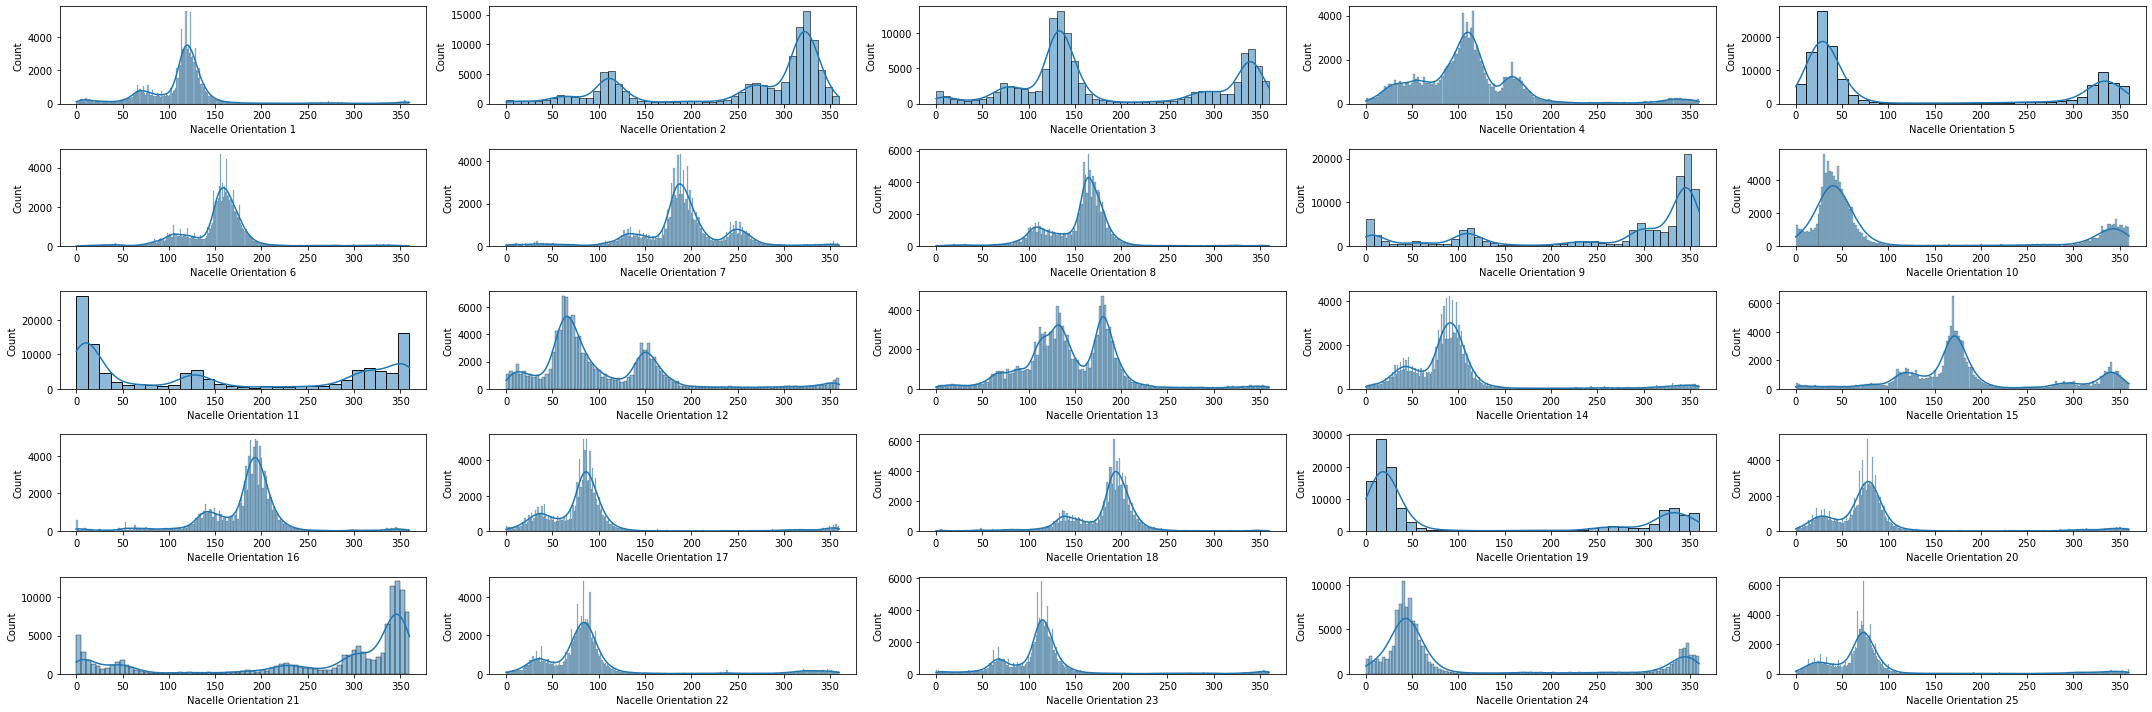

In [34]:
fig, axes = plt.subplots(5, 5, figsize=(30, 10))
for i in range(len(data_cat.columns)):
    row, col = i//5, i%5
    sns.histplot(ax=axes[row,col], data=data_cat, x=data_cat.columns[i], kde=True)
plt.tight_layout()

In [97]:
daily_data = data_cat.groupby([data_cat.index.year, 
                                data_cat.index.month, 
                                data_cat.index.day])
data_min = data_cat.min().min()
data_max = data_cat.max().max()
for day, data in daily_data:
    if day[2] == 30:
        fig, ax = plt.subplots(figsize=(20,8))
        ax.plot(data)
        ax.set_title(day, size=22)
        ax.set_ylim(data_min,data_max)
        plt.grid(True)
        plt.xlabel('Date & Time', fontsize=18)

AttributeError: 'Index' object has no attribute 'year'